In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [14]:
from Preprocessing_makers import preprocess_play, preprocess_tracking, preprocess_players

In [4]:
games = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/games.csv")

scout = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/PFFScoutingData.csv")

players = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/players.csv")

play = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/plays.csv")

track18 = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/tracking2018.csv")
track19 = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/tracking2019.csv")
track20 = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/tracking2020.csv")

In [18]:
def clock(x):
    gameClock = play.loc[x]['gameClock']
    quarter = play.loc[x]['quarter']

    gameClock_split = gameClock.split(':')

    minutes = gameClock_split[0]
    seconds = gameClock_split[1]

    total_minutes = int(minutes) + 15 * (quarter - 1)

    return (total_minutes * 60) + int(seconds)

In [19]:
play['penaltyYards']=play['penaltyYards'].fillna(0)
#clock: MM:SS to Seconds
play['gameClockSeconds'] = play.index.map(lambda x: clock(x))
#redefine nulls in penalty as no penalty
play['penaltyCodes']=play['penaltyCodes'].fillna('no penalty')

In [20]:
track_ep18, track_ep19, track_ep20, track_fg18, track_fg19, track_fg20, track_punt18, track_punt19, track_punt20, track_ko18, track_ko19, track_ko20, track_fep, track_ffg, track_fpunt, track_fko = preprocess_tracking(track18,track19,track20,play)

In [73]:
track_ep18.to_csv("tracking_ep18.csv")
track_ep19.to_csv("tracking_ep19.csv")
track_ep20.to_csv("tracking_ep20.csv")
track_fep.to_csv("tracking_fep.csv")

In [32]:
track_ep18

,gameId,playId,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,playDirection
0,2018090600,2883,2018-09-07T03:15:45.900,95.35,28.223333,0.00,0.00,0.00,90.0,38.35,None,37117.0,Brooks Reed,50.0,DE,away,1,left
1,2018090600,2883,2018-09-07T03:15:46.000,95.33,28.203333,0.00,0.00,0.02,90.0,42.56,None,37117.0,Brooks Reed,50.0,DE,away,2,left
2,2018090600,2883,2018-09-07T03:15:46.100,95.33,28.203333,0.00,0.00,0.00,90.0,44.11,None,37117.0,Brooks Reed,50.0,DE,away,3,left
3,2018090600,2883,2018-09-07T03:15:46.200,95.31,28.183333,0.00,0.00,0.03,90.0,47.29,None,37117.0,Brooks Reed,50.0,DE,away,4,left
4,2018090600,2883,2018-09-07T03:15:46.300,95.31,28.183333,0.00,0.00,0.00,90.0,48.01,None,37117.0,Brooks Reed,50.0,DE,away,5,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417186,2018123015,2862,2018-12-30T23:30:26.400,131.39,22.893333,6.75,4.42,0.84,NaN,NaN,None,NaN,football,NaN,NaN,football,50,left
1417187,2018123015,2862,2018-12-30T23:30:26.500,132.01,22.863333,6.63,4.19,0.62,NaN,NaN,None,NaN,football,NaN,NaN,football,51,left
1417188,2018123015,2862,2018-12-30T23:30:26.600,131.13,22.433333,3.51,0.13,0.98,NaN,NaN,None,NaN,football,NaN,NaN,football,52,left
1417189,2018123015,2862,2018-12-30T23:30:26.700,130.63,22.313333,3.43,0.98,0.52,NaN,NaN,None,NaN,football,NaN,NaN,football,53,left


In [21]:
track_fep

,gameId,playId,time,x,y,s,a,dis,event,displayName,team,frameId,playDirection
0,2018090600,2883,2018-09-07T03:15:45.900,94.94,26.303333,0.00,0.00,0.00,None,football,football,1,left
1,2018090600,2883,2018-09-07T03:15:46.000,94.94,26.303333,0.00,0.00,0.00,None,football,football,2,left
2,2018090600,2883,2018-09-07T03:15:46.100,94.94,26.303333,0.00,0.00,0.00,None,football,football,3,left
3,2018090600,2883,2018-09-07T03:15:46.200,94.94,26.303333,0.00,0.00,0.00,None,football,football,4,left
4,2018090600,2883,2018-09-07T03:15:46.300,94.94,26.303333,0.00,0.00,0.00,None,football,football,5,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182368,2021010315,4166,2021-01-04T00:23:37.500,125.73,26.020000,14.85,5.49,1.51,None,football,football,47,right
182369,2021010315,4166,2021-01-04T00:23:37.600,127.19,26.050000,14.31,5.52,1.46,None,football,football,48,right
182370,2021010315,4166,2021-01-04T00:23:37.700,128.60,26.080000,13.76,5.54,1.40,None,football,football,49,right
182371,2021010315,4166,2021-01-04T00:23:37.800,129.94,26.110000,13.21,5.53,1.35,None,football,football,50,right


In [22]:
def get_play(game_id, play_id, tracking):
    game = tracking[tracking['gameId'] == game_id]
    play = game[game['playId'] == play_id]
    return play

In [23]:
play2883=get_play(2018090600, 2883, track_fep)

In [43]:
play2883

,gameId,playId,time,x,y,s,a,dis,event,displayName,team,frameId,playDirection
0,2018090600,2883,2018-09-07T03:15:45.900,94.94,26.303333,0.00,0.00,0.00,None,football,football,1,left
1,2018090600,2883,2018-09-07T03:15:46.000,94.94,26.303333,0.00,0.00,0.00,None,football,football,2,left
2,2018090600,2883,2018-09-07T03:15:46.100,94.94,26.303333,0.00,0.00,0.00,None,football,football,3,left
3,2018090600,2883,2018-09-07T03:15:46.200,94.94,26.303333,0.00,0.00,0.00,None,football,football,4,left
4,2018090600,2883,2018-09-07T03:15:46.300,94.94,26.303333,0.00,0.00,0.00,None,football,football,5,left
5,2018090600,2883,2018-09-07T03:15:46.400,94.94,26.303333,0.00,0.00,0.00,None,football,football,6,left
6,2018090600,2883,2018-09-07T03:15:46.500,94.94,26.303333,0.00,0.00,0.00,None,football,football,7,left
7,2018090600,2883,2018-09-07T03:15:46.600,94.94,26.303333,0.00,0.00,0.00,None,football,football,8,left
8,2018090600,2883,2018-09-07T03:15:46.700,94.94,26.303333,0.00,0.00,0.00,None,football,football,9,left
9,2018090600,2883,2018-09-07T03:15:46.800,94.94,26.303333,0.00,0.00,0.00,None,football,football,10,left


We use the `x` and `y` values from lines 24 and 25 to draw a line here. Note the clear stopping of the ball, but more importantly the increase in velocity of the ball by about 20yrds/sec.
Observe that the ball moves down in the `y` direction between 23 and 24 (the direction increasing from 0.0 to 0.55), likely still contacting with the foot which is how the direction changes.

Let's watch this play to better understand when the kick occurs. We note that the actual point (when the football passes through the endgoal) occurs between frame 38 and 39, not a frame 43 which is labeled `extra_point`.

In [25]:
from play_animation import animate_play

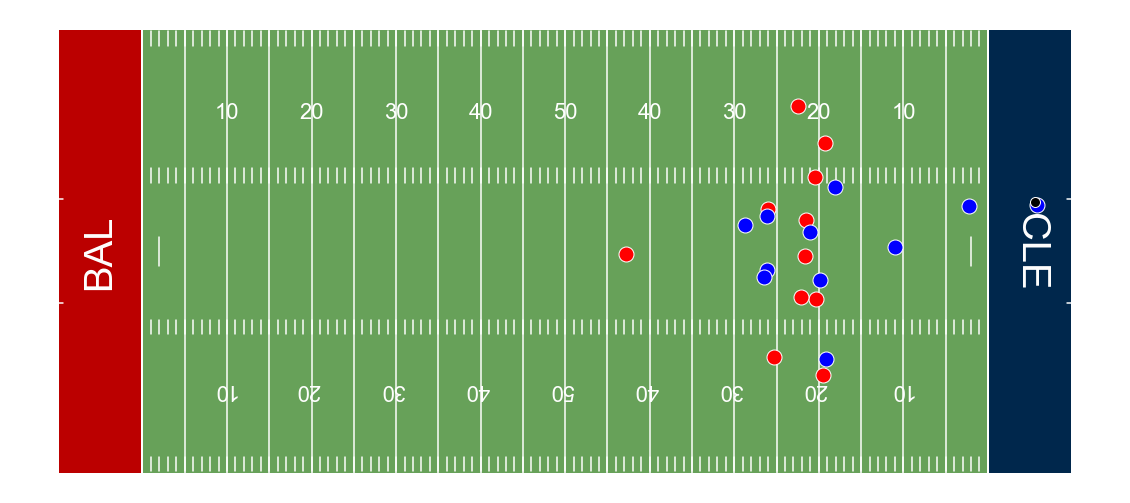

In [29]:
#test code
animate_play(2018123000, 392, track18, games=games, save_to='test_anim_lib.mp4')

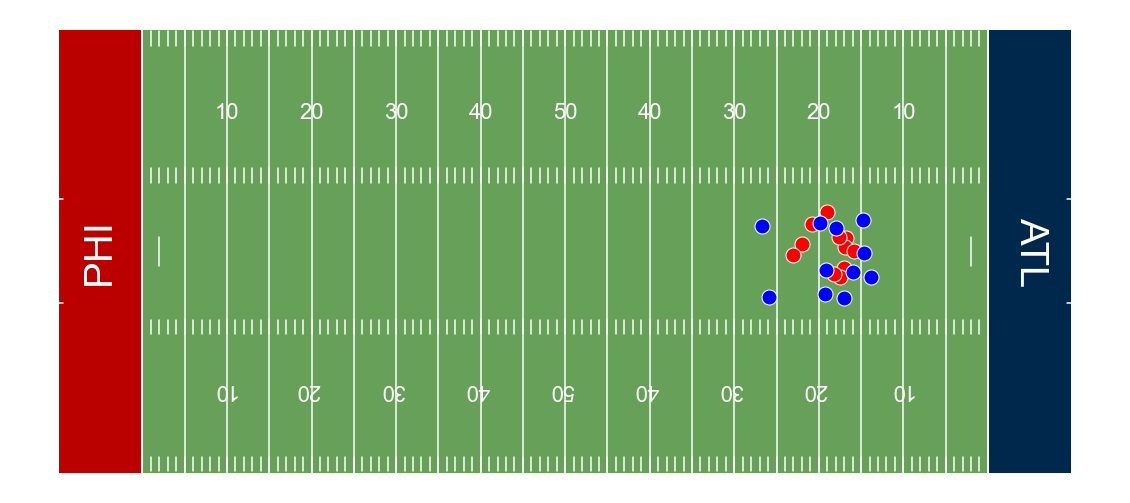

In [31]:
animate_play(2018090600, 2883, track18, games=games, save_to='sample_ep.mp4')

Let's find some more plays. Make extrapoint dataset.

In [35]:
play_extrapoint = play.loc[play['specialTeamsPlayType']=='Extra Point']
play_extrapoint

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,gameClockSeconds
15,2018090600,2883,"J.Elliott extra point is GOOD, Center-R.Lovato...",3,0,0,PHI,Extra Point,Kick Attempt Good,44966.0,...,NaN,0.0,9,6,NaN,NaN,NaN,0,25,2077
19,2018090600,3553,"M.Bryant extra point is No Good, Hit Right Upr...",4,0,0,ATL,Extra Point,Kick Attempt No Good,27091.0,...,NaN,0.0,10,12,NaN,NaN,NaN,0,25,3288
25,2018090900,380,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,0,0,BAL,Extra Point,Kick Attempt Good,39470.0,...,NaN,0.0,6,0,NaN,NaN,NaN,0,95,522
30,2018090900,972,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,0,0,BAL,Extra Point,Kick Attempt Good,39470.0,...,NaN,0.0,13,0,NaN,NaN,NaN,0,95,92
44,2018090900,2757,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",3,0,0,BAL,Extra Point,Kick Attempt Good,39470.0,...,NaN,0.0,32,0,NaN,NaN,NaN,0,25,2548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2021010315,2813,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,0,0,SF,Extra Point,Kick Attempt Good,47590.0,...,NaN,0.0,15,6,NaN,NaN,NaN,0,95,3562
19970,2021010315,3074,"J.Myers extra point is No Good, Wide Left, Cen...",4,0,0,SEA,Extra Point,Kick Attempt No Good,41175.0,...,NaN,0.0,16,12,NaN,NaN,NaN,0,25,3354
19973,2021010315,3667,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,0,0,SEA,Extra Point,Kick Attempt Good,41175.0,...,NaN,0.0,16,18,NaN,NaN,NaN,0,25,2840
19975,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,0,0,SEA,Extra Point,Kick Attempt Good,41175.0,...,NaN,0.0,16,25,NaN,NaN,NaN,0,25,2809


In [41]:
animate_play(2018090600, 3553, track18, games=games, save_to='sample_ep2.mp4')
animate_play(2018090900, 380, track18, games=games, save_to='sample_ep3.mp4')

sample_ep2=get_play(2018090600, 3553, track_fep)
sample_ep3=get_play(2018090900, 380, track_fep)

In [39]:
sample_ep2.head(40)

,gameId,playId,time,x,y,s,a,dis,event,displayName,team,frameId,playDirection
52,2018090600,3553,2018-09-07T03:45:06.800,94.85,26.553333,0.00,0.00,0.00,None,football,football,1,left
53,2018090600,3553,2018-09-07T03:45:06.900,94.85,26.553333,0.00,0.00,0.00,None,football,football,2,left
54,2018090600,3553,2018-09-07T03:45:07.000,94.85,26.553333,0.00,0.00,0.00,None,football,football,3,left
55,2018090600,3553,2018-09-07T03:45:07.100,94.86,26.553333,0.00,0.00,0.00,None,football,football,4,left
56,2018090600,3553,2018-09-07T03:45:07.200,94.86,26.553333,0.00,0.00,0.00,None,football,football,5,left
57,2018090600,3553,2018-09-07T03:45:07.300,94.86,26.553333,0.00,0.00,0.00,None,football,football,6,left
58,2018090600,3553,2018-09-07T03:45:07.400,94.86,26.553333,0.00,0.00,0.00,None,football,football,7,left
59,2018090600,3553,2018-09-07T03:45:07.500,94.86,26.553333,0.00,0.00,0.00,None,football,football,8,left
60,2018090600,3553,2018-09-07T03:45:07.600,94.86,26.553333,0.00,0.00,0.00,None,football,football,9,left
61,2018090600,3553,2018-09-07T03:45:07.700,94.86,26.553333,0.00,0.00,0.00,None,football,football,10,left


In [42]:
sample_ep3

,gameId,playId,time,x,y,s,a,dis,event,displayName,team,frameId,playDirection
115,2018090900,380,2018-09-09T17:13:33.700,95.03,25.54,0.01,0.01,0.01,None,football,football,1,right
116,2018090900,380,2018-09-09T17:13:33.800,95.03,25.55,0.01,0.01,0.00,None,football,football,2,right
117,2018090900,380,2018-09-09T17:13:33.900,95.03,25.55,0.01,0.01,0.00,None,football,football,3,right
118,2018090900,380,2018-09-09T17:13:34.000,95.03,25.55,0.01,0.01,0.00,None,football,football,4,right
119,2018090900,380,2018-09-09T17:13:34.100,95.03,25.55,0.00,0.01,0.00,None,football,football,5,right
120,2018090900,380,2018-09-09T17:13:34.200,95.03,25.55,0.00,0.00,0.00,None,football,football,6,right
121,2018090900,380,2018-09-09T17:13:34.300,95.03,25.54,0.00,0.00,0.00,None,football,football,7,right
122,2018090900,380,2018-09-09T17:13:34.400,95.03,25.55,0.00,0.00,0.00,None,football,football,8,right
123,2018090900,380,2018-09-09T17:13:34.500,95.29,25.80,1.35,0.12,0.36,None,football,football,9,right
124,2018090900,380,2018-09-09T17:13:34.600,95.15,25.79,1.34,0.22,0.13,None,football,football,10,right


We want to write a function that will isolate the maybe 5 rows around the `extra_point_attempt`.
First, locate the `extra_point_attempt` and we will expand `get_play` to return the event dataframe too.

In [67]:
epSam_index=sample_ep3.index[sample_ep3['event'] == 'extra_point_attempt'].values[0]

In [68]:
epSam_index

140

In [69]:
sample_ep3.loc[epSam_index-4:epSam_index+4,:]

,gameId,playId,time,x,y,s,a,dis,event,displayName,team,frameId,playDirection
136,2018090900,380,2018-09-09T17:13:35.800,87.42,25.59,2.77,2.86,0.27,None,football,football,22,right
137,2018090900,380,2018-09-09T17:13:35.900,87.17,25.58,2.52,2.81,0.25,None,football,football,23,right
138,2018090900,380,2018-09-09T17:13:36.000,86.93,25.56,2.26,2.64,0.24,None,football,football,24,right
139,2018090900,380,2018-09-09T17:13:36.100,86.72,25.54,2.02,2.36,0.21,None,football,football,25,right
140,2018090900,380,2018-09-09T17:13:36.200,86.53,25.53,1.79,2.10,0.19,extra_point_attempt,football,football,26,right
141,2018090900,380,2018-09-09T17:13:36.300,89.00,25.67,26.18,6.17,2.47,None,football,football,27,right
142,2018090900,380,2018-09-09T17:13:36.400,91.04,25.73,25.74,6.73,2.04,None,football,football,28,right
143,2018090900,380,2018-09-09T17:13:36.500,93.67,25.79,25.02,7.45,2.63,None,football,football,29,right
144,2018090900,380,2018-09-09T17:13:36.600,96.25,25.84,24.16,8.16,2.58,None,football,football,30,right


In [70]:
def get_play(game_id, play_id, tracking):
    '''
    This function creates the tracking dataframes.

    Parameters:
    -----------
    game_id, play_id - game and play of interest
    tracking - tracking dataframe the that game and play are in
    ...

    Returns:
    -----------
    play - dataframe of just the tracking data for the particular play of interest
    '''
    game = tracking[tracking['gameId'] == game_id]
    play = game[game['playId'] == play_id]
    
    return play

In [ ]:
def get_event(game_id, play_id, tracking_f, event):
    '''
    This function creates a small dataframe for football tracking around the event.

    Parameters:
    -----------
    game_id, play_id - game and play of interest
    tracking_f - football-specific tracking dataframe the that game and play are in
    event - string of the event that we want to find, i.e., 'extra_point_attempt'
    ...

    Returns:
    -----------
    event_df - 11-row dataframe of tracking data around the event
    frame_id - frameId of event
    '''
    #game = tracking_f[tracking_f['gameId'] == game_id]
   #play = game[game['playId'] == play_id]
    play = get_play(game_id, play_id, tracking_f)
    
    index = play.index[play['event']== event].values[0]
    event_df = play.loc[index-5:index+5,:]
    max_index = event_df['s'].idxmax()
    frame_id = play.loc[max_index]
    return event_df, frame_id

In [71]:
play3, event3 = get_play(2018090900, 380, track_fep, 'extra_point_attempt')

In [72]:
event3

,gameId,playId,time,x,y,s,a,dis,event,displayName,team,frameId,playDirection
135,2018090900,380,2018-09-09T17:13:35.700,87.69,25.61,3.02,2.92,0.27,None,football,football,21,right
136,2018090900,380,2018-09-09T17:13:35.800,87.42,25.59,2.77,2.86,0.27,None,football,football,22,right
137,2018090900,380,2018-09-09T17:13:35.900,87.17,25.58,2.52,2.81,0.25,None,football,football,23,right
138,2018090900,380,2018-09-09T17:13:36.000,86.93,25.56,2.26,2.64,0.24,None,football,football,24,right
139,2018090900,380,2018-09-09T17:13:36.100,86.72,25.54,2.02,2.36,0.21,None,football,football,25,right
140,2018090900,380,2018-09-09T17:13:36.200,86.53,25.53,1.79,2.10,0.19,extra_point_attempt,football,football,26,right
141,2018090900,380,2018-09-09T17:13:36.300,89.00,25.67,26.18,6.17,2.47,None,football,football,27,right
142,2018090900,380,2018-09-09T17:13:36.400,91.04,25.73,25.74,6.73,2.04,None,football,football,28,right
143,2018090900,380,2018-09-09T17:13:36.500,93.67,25.79,25.02,7.45,2.63,None,football,football,29,right
144,2018090900,380,2018-09-09T17:13:36.600,96.25,25.84,24.16,8.16,2.58,None,football,football,30,right


In [75]:
event3['x'][event3['s'].idxmax()]

89.0

In [78]:
def find_kickline(event_df):
    '''
    This function gives a straightline expectation of where the football crosses the endzone.

    Parameters:
    -----------
    event_df - 11-row dataframe of tracking data around the event (from get_play)
    ...
    finds max_index where velocity is highest and uses the x & y values from max_index
    and max_index+1 to calculate a straight line trajectory of the football

    Returns:
    -----------
    y value expectation of football at x=120
    '''
    max_index = event_df['s'].idxmax()
    
    x1 = event_df['x'][max_index]
    y1 = event_df['y'][max_index]
    x2 = event_df['x'][max_index+1]
    y2 = event_df['y'][max_index+1]
    
    m = (y2-y1)/(x2-x1)
    
    return m*(120-x1)+y1


In [77]:
find_kickline(event3)

26.581764705882332